# importing the required libraries and dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
from keras.datasets import mnist
import os
import cv2
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

***loading the dataset***

```python

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
train_X[0].shape

(28, 28)

**each image is of 28*28 pixels and has 784 features**

```python

**visulaize one example of the dataset**

```python

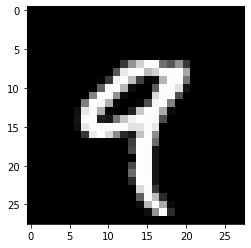

In [4]:
plt.imshow(train_X[4],cmap="gray")

**then normalize data to get all values between 0 and 1**

```python

In [5]:
train_X_normed = train_X/255
test_X_normed = test_X/255

**convert y data to categorical**

```python

In [14]:
train_y_hot = to_categorical(train_y,10)
test_y_hot = to_categorical(test_y,10) 

**then use tensorflow to build the model architecture**
```python

In [10]:
Lenet = tf.keras.Sequential([     
    tfl.ZeroPadding2D(padding=2,input_shape=(28,28,1)),
    tfl.Conv2D(6,5,activation='linear',input_shape=(32,32,1)),
    tfl.AveragePooling2D(2,strides=2),
    tfl.Conv2D(16,5,activation='linear'),
    tfl.AveragePooling2D(2,strides=2),
    tfl.Flatten(),
    tfl.Dense(120),
    tfl.Dense(84),
    tfl.Dense(10,activation = 'softmax')
])

**then here the model summary as we see this architecture has about 61k parameters**

```python

In [11]:
Lenet.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
Lenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPaddi  (None, 32, 32, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                      

**create training and validation sets with batch size 64**

```python

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_X_normed,train_y_hot)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((test_X_normed, test_y_hot)).batch(64)

**start to train model on epochs=20 and save the values of loss and accuracy in history**

```python

In [28]:
history = Lenet.fit(train_dataset,epochs=20,validation_data=test_dataset)

Epoch 1/20
938/938 [==============================] - 30s 32ms/step - loss: 0.3149 - accuracy: 0.9109 - val_loss: 0.3486 - val_accuracy: 0.8953
Epoch 2/20
938/938 [==============================] - 27s 29ms/step - loss: 0.3131 - accuracy: 0.9116 - val_loss: 0.3455 - val_accuracy: 0.8970
Epoch 3/20
938/938 [==============================] - 27s 29ms/step - loss: 0.3114 - accuracy: 0.9119 - val_loss: 0.3421 - val_accuracy: 0.8988
Epoch 4/20
938/938 [==============================] - 27s 28ms/step - loss: 0.3099 - accuracy: 0.9124 - val_loss: 0.3387 - val_accuracy: 0.9003
Epoch 5/20
938/938 [==============================] - 27s 28ms/step - loss: 0.3085 - accuracy: 0.9127 - val_loss: 0.3368 - val_accuracy: 0.9010
Epoch 6/20
938/938 [==============================] - 26s 28ms/step - loss: 0.3073 - accuracy: 0.9132 - val_loss: 0.3367 - val_accuracy: 0.9015
Epoch 7/20
938/938 [==============================] - 27s 28ms/step - loss: 0.3062 - accuracy: 0.9137 - val_loss: 0.3365 - val_accuracy:

In [29]:
import pandas as pd

**convert history variable to dataframe to visualize it**

```python

In [30]:
df = pd.DataFrame(history.history)

In [31]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.314924,0.910933,0.348564,0.8953
1,0.313100,0.911567,0.345458,0.8970
2,0.311432,0.911900,0.342122,0.8988
3,0.309895,0.912383,0.338691,0.9003
4,0.308524,0.912733,0.336771,0.9010


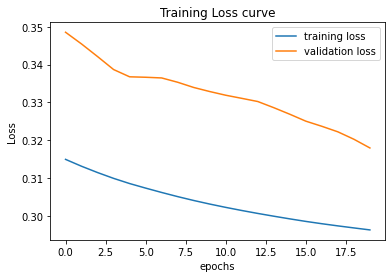

In [32]:
plt.plot(df['loss'],label="training loss")
plt.plot(df['val_loss'],label="validation loss")
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Training Loss curve')
plt.legend()

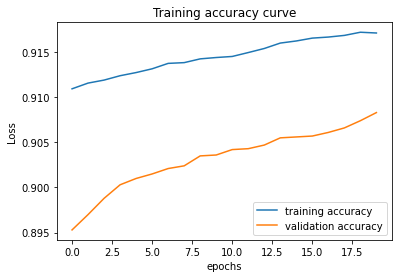

In [33]:
plt.plot(df['accuracy'],label="training accuracy")
plt.plot(df['val_accuracy'],label="validation accuracy")
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Training accuracy curve')
plt.legend()

**saving model in h5 format**

In [51]:
Lenet.save('./model_weights/model.h5')

**predict on the visualization image**

```python

In [55]:
predict_example = train_X_normed[4].reshape(1,28,28,1)
pre = Lenet.predict(predict_example)
print(np.argmax(pre))

1/1 [==============================] - 0s 76ms/step
9


**another example of prediction**

```python

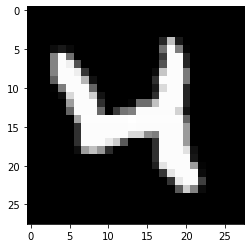

In [56]:
plt.imshow(train_X[20],cmap="gray")

In [58]:
predict_example = train_X_normed[20].reshape(1,28,28,1)
pre = Lenet.predict(predict_example)
print(np.argmax(pre))

1/1 [==============================] - 0s 87ms/step
4
